# Model
Transfer Learning and Fine Tuning

In [ ]:
# %%script false --no-raise-error

n_classes=1
input_shape = IMG_SIZE + (3,)

In [ ]:
# %%script false --no-raise-error

data_augmentation = tf.keras.Sequential([ tf.keras.layers.RandomFlip(mode="horizontal", seed=42), tf.keras.layers.RandomRotation(factor=0.05, seed=42), tf.keras.layers.RandomContrast(factor=0.2, seed=42) ])# tf.keras.Sequential([ tf.keras.layers.RandomFlip('horizontal'), tf.keras.layers.RandomRotation(0.2), ])

## Freeze layers

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)       5919312   
 al)                                                             
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 5,920,593
Trainable params: 1,281
Non-trainab

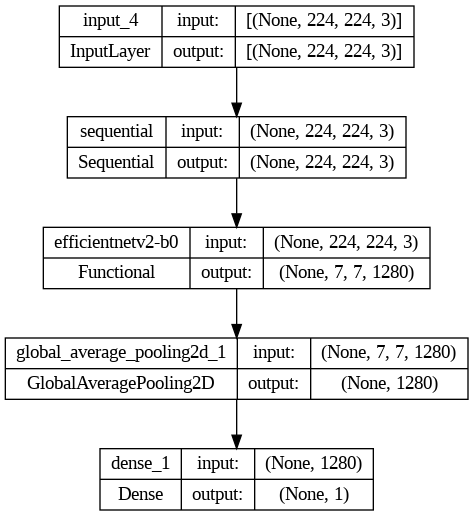

In [ ]:
# %%script false --no-raise-error

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(input_shape=input_shape, weights="imagenet",include_top=False)

# freezing
for layer in base_model.layers:
  layer.trainable = False


# input
inputs = tf.keras.Input(shape=input_shape)

# data augmentation
x = data_augmentation(inputs)

#preprocess
x = tf.keras.applications.efficientnet_v2.preprocess_input(x)

x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# output
prediction_layer = tf.keras.layers.Dense(units = n_classes, activation='sigmoid')
outputs = prediction_layer(x) 


model = tf.keras.Model(inputs, outputs)
model.summary()

tf.keras.utils.plot_model(model, to_file="/content/img_model.png", show_shapes=True) # plot


In [ ]:
%%script false --no-raise-error

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
: Optimizer
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
: Loss Fn
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""                               
lossfn = tf.keras.losses.BinaryCrossentropy()

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
: Model Summary
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
model.compile(optimizer=optimizer, loss=lossfn, metrics=[ 'accuracy' ])

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""
: Training
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""

history = model.fit(train_dataset, validation_data=validation_dataset, epochs=3, batch_size=BATCH_SIZE)

In [ ]:
%%script false --no-raise-error

model.save(f"{MODELS_PATH}EfficientNetV2B0-gender.h5")


## Unfreeze Layers

In [ ]:
def start_training(model, epochs):
  
  
  for layer in model.layers:
    layer.trainable = False

  for layer in model.layers[180:]:
    layer.trainable = True

  """""""""""""""""""""""""""""""""""""""""""""""""""""""""
  : Optimizer
  """""""""""""""""""""""""""""""""""""""""""""""""""""""""

  optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

  """""""""""""""""""""""""""""""""""""""""""""""""""""""""                               
  : Loss Fn
  """""""""""""""""""""""""""""""""""""""""""""""""""""""""                               
  lossfn = tf.keras.losses.BinaryCrossentropy()

  """""""""""""""""""""""""""""""""""""""""""""""""""""""""
  : Model Summary
  """""""""""""""""""""""""""""""""""""""""""""""""""""""""
  model.compile(optimizer=optimizer, loss=lossfn, metrics=[ 'accuracy' ])

  """""""""""""""""""""""""""""""""""""""""""""""""""""""""
  : Training
  """""""""""""""""""""""""""""""""""""""""""""""""""""""""

  history = model.fit(train_dataset, validation_data=validation_dataset, epochs=epochs, batch_size=BATCH_SIZE)

  model.save(f"{MODELS_PATH}EfficientNetV2B0-gender.h5")

  return history, model

In [ ]:
for i in range(10):
  history, _ = start_training(keras.models.load_model(f"{MODELS_PATH}EfficientNetV2B0-gender.h5"), epochs=3)    

Epoch 1/3


368/368 [==============================] - 673s 2s/step - loss: 0.2590 - accuracy: 0.9185 - val_loss: 0.1913 - val_accuracy: 0.9385
Epoch 2/3
368/368 [==============================] - 659s 2s/step - loss: 0.2637 - accuracy: 0.9157 - val_loss: 0.1913 - val_accuracy: 0.9385
Epoch 3/3
 80/368 [=====>........................] - ETA: 8:25 - loss: 0.2680 - accuracy: 0.9160

KeyboardInterrupt: ignored

## Testing

In [ ]:
BATCH_SIZE = 256
IMG_SIZE = (224, 224)

In [ ]:
model=keras.models.load_model(f"{MODELS_PATH}EfficientNetV2B0-gender.h5")

In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(f'{LOCAL_PATH}Test',
            shuffle=True,
            batch_size=BATCH_SIZE,
            image_size=IMG_SIZE,
            seed=42)

test_dataset2 = tf.keras.utils.image_dataset_from_directory('/content/Validation',
            shuffle=True,
            batch_size=BATCH_SIZE,
            image_size=IMG_SIZE,
            seed=42)

test_dataset3 = tf.keras.utils.image_dataset_from_directory('/content/Training',
            shuffle=True,
            batch_size=BATCH_SIZE,
            image_size=IMG_SIZE,
            seed=42)


Found 20001 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.
Found 47009 files belonging to 2 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print('test acc:', test_acc)
print('test_loss:',test_loss)

79/79 [==============================] - 32s 379ms/step - loss: 0.0455 - accuracy: 0.9833
test acc: 0.9833008646965027
test_loss: 0.045544784516096115


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset2)
print('test acc:', test_acc)
print('test_loss:',test_loss)

46/46 [==============================] - 22s 409ms/step - loss: 0.1913 - accuracy: 0.9385
test acc: 0.9385355114936829
test_loss: 0.19132180511951447


In [ ]:
test_loss, test_acc = model.evaluate(test_dataset3)
print('test acc:', test_acc)
print('test_loss:',test_loss)

184/184 [==============================] - 79s 409ms/step - loss: 0.2069 - accuracy: 0.9364
test acc: 0.936437726020813
test_loss: 0.2068587690591812


In [ ]:
y = np.concatenate([y for x, y in test_dataset], axis=0)
y

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)